In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from rlxai import ImageXAI

In [3]:

import gym
import numpy as np
import matplotlib.pyplot as plt
from torch import nn 
from torchvision import models
import torch 
env = gym.make("Breakout-v4")

/opt/conda/envs/xai/lib/python3.8/site-packages/ale_py/roms/__init__.py:94: DeprecationWarning: Automatic importing of atari-py roms won't be supported in future releases of ale-py. Please migrate over to using `ale-import-roms` OR an ALE-supported ROM package. To make this warning disappear you can run `ale-import-roms --import-from-pkg atari_py.atari_roms`.For more information see: https://github.com/mgbellemare/Arcade-Learning-Environment#rom-management
  _RESOLVED_ROMS = _resolve_roms()
A.L.E: Arcade Learning Environment (version +978d2ce)
[Powered by Stella]


In [39]:

from pathlib import Path
from rlxai.agent.ppo_v2 import PPO

################ PPO hyperparameters ################


eps_clip = 0.1  # clip parameter for PPO
gamma = 0.99  # discount factor

lr_actor = 0.0005  # learning rate for actor network
lr_critic = 0.001  # learning rate for critic network
n_step = 1000 # update step 
K_epochs = 5  # update policy for K epochs
batch_size = 128

action_dim = env.action_space.n


device = "cpu"
ppo_agent = PPO(3, action_dim, lr_actor, lr_critic, gamma, K_epochs, batch_size, eps_clip, device=device,n_step=n_step)
model_path = Path("./../model")
model_algo_path = model_path.joinpath("./PPO")
model_algo_path.mkdir(exist_ok=True, parents=True)

checkpoint_path = model_algo_path.joinpath("./model.pt")
try :
    print("load")
    ppo_agent.load(checkpoint_path)
except Exception as e :
    print(e)
    pass 

load


In [434]:
from rlxai.dp.img import data_transform

(1, 1, 84, 84)


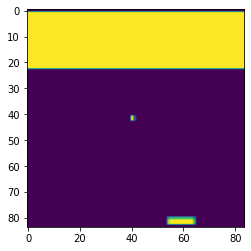

In [435]:
s = env.reset()
s ,_,_,_= env.step(1)
print(data_transform(s).shape)
plt.imshow(np.squeeze(data_transform(s),0).transpose(1,2,0))

In [436]:
s = env.reset()
s,_,_,_ = env.step(1)
state_list =[ data_transform(s)] * 3

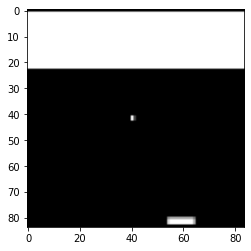

In [437]:
plt.imshow(np.concatenate(state_list , axis=1).squeeze(0).transpose(1,2,0))
plt.show()

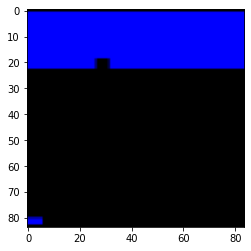

In [519]:
s ,_,_,_= env.step(0)
state_list.pop(0)
state_list.append(data_transform(s))
plt.imshow(np.concatenate(state_list , axis=1).squeeze(0).transpose(1,2,0))
plt.show()

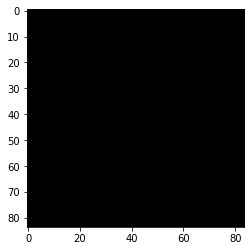

In [518]:
s ,_,_,info= env.step(3)
state_list.pop(0)
state_list.append(data_transform(np.zeros_like(s)))
plt.imshow(np.concatenate(state_list , axis=1).squeeze(0).transpose(1,2,0))
plt.show()

In [419]:
s ,_,_,_= env.step(2)
state_list.pop(0)
state_list.append(data_transform(s))
plt.imshow(np.concatenate(state_list , axis=1).squeeze(0).transpose(1,2,0))
plt.show()

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 2, the array at index 0 has size 84 and the array at index 1 has size 210

In [417]:
import cv2
def img_crop(img_arr):
    # breakout
    return img_arr[55:-15, 15:-15, :]


def rgb2gray(rgb):
    image_data = cv2.cvtColor(rgb, cv2.COLOR_BGR2GRAY)
    image_data[image_data > 0] = 255
    return image_data

def img_resize(img_arr) :
    img_arr = cv2.resize(img_arr, (84, 84))
    image_data = np.reshape(img_arr, (84, 84, 1))
    return image_data
    


def totensor(img_arr):
    return torch.FloatTensor(img_arr)


def data_transform(x):
    # breakout 
    # x = img_crop(x)
    # x = rgb2gray(x)
    x = np.expand_dims(x.transpose((2, 0, 1)),axis=0)
    x = totensor(x)
    return x

In [167]:
target2idx = {i:idx  for idx , i in enumerate(env.unwrapped.get_action_meanings())}
xai = ImageXAI(ppo_agent.policy.actor ,  target2idx , data_transform)

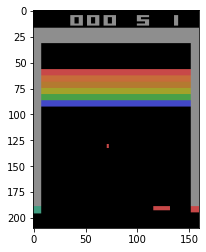

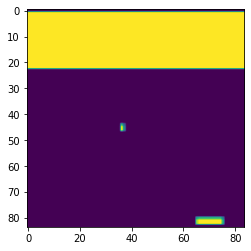

In [168]:
img_arr = env.render(mode="rgb_array")
plt.imshow(img_arr)
plt.show()
plt.imshow(img_resize(rgb2gray(img_crop(img_arr))))
plt.show()

In [169]:
img_crop(ori_img_arr)

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[200,  72,  72],
        [200,  72,  72],
        [200,  72,  72],
        ...,
        [200,  72,  72],
        [200,  72,  72],
        [200,  72,  72]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

In [170]:
env.reset()
ori_img_arr_1 ,_,_,_= env.step(1)
ori_img_arr_2 ,_,_,_= env.step(2)
ori_img_arr_3 ,_,_,_= env.step(3)

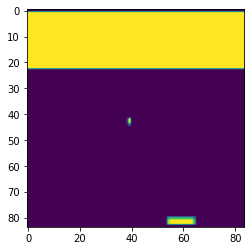

In [185]:
plt.imshow(x[0])

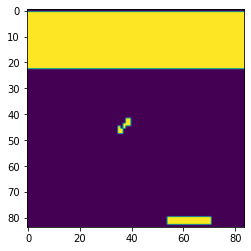

In [258]:
x = [img_resize(rgb2gray(img_crop(i))) for i in [ori_img_arr_1 , ori_img_arr_2, ori_img_arr_3]]
xx = np.concatenate(x,axis=2)
xx = rgb2gray(xx)
plt.imshow(xx)

In [189]:
# env.reset()
# ori_img_arr = env.step(1)
# ori_img_arr = env.render(mode="rgb_array")
# img_arr = np.concatenate([img_resize(img_crop(ori_img_arr))] * 3 ,axis=2)

In [190]:
# ori_img_arr = env.render(mode="rgb_array")
# bin = img_resize(img_crop(ori_img_arr))
# bin += img_resize(img_crop(ori_img_arr))
# bin +=img_resize(img_crop(ori_img_arr))
# bin = np.clip((bin/3) , 0, 255).astype(int)
# plt.imshow(bin)


In [191]:
# ori_img_arr = env.step(1)
# np.sum([img_resize(img_crop(ori_img_arr))],axis=3).shape

In [192]:
# ori_img_arr = env.render(mode="rgb_array")
# plt.imshow(ori_img_arr)
# plt.show()
# plt.imshow(img_resize(img_crop(ori_img_arr)))
# plt.show()
# # plt.imshow(img_arr)
# # plt.show()

In [327]:
env.reset()
env.step(1)
env.step(2)
env.step(3)
ori_img_arr_1 ,_,_,_= env.step(2)
ori_img_arr_2 ,_,_,_= env.step(2)
ori_img_arr_3 ,_,_,_= env.step(3)

x = [img_resize(img_crop(i)) for i in [ori_img_arr_1 , ori_img_arr_2, ori_img_arr_3]]
xx = np.concatenate(x,axis=2)
img_arr = xx
# img_arr = img_resize(img_crop(ori_img_arr))
xai(img_arr , "0")

run...
classify...
run for xai...
Approximation delta:  tensor([0.0100], dtype=torch.float64)


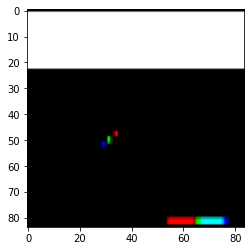

In [348]:
plt.imshow(xx)

In [328]:
from captum.attr import GuidedGradCam , LayerConductance

In [329]:
from captum.attr import visualization as viz
def show_attr(attr_map, save_path):
    plt_fig, _ = viz.visualize_image_attr(
        attr_map,  # adjust shape to height, width, channels
        method="heat_map",
        sign="all",
        show_colorbar=True,
        use_pyplot=True,
    )
    if save_path is None:
        plt.show()
    else:
        plt_fig.savefig(save_path)
        plt.close()


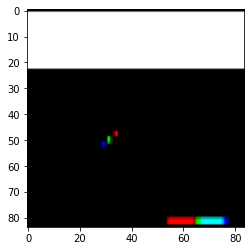

In [330]:
plt.imshow(xai.input_dict["image"])

In [341]:
target = 0
guided_gc = GuidedGradCam(xai.model,xai.model.conv1)
input = xai.change_dim(xai.transform_input(xai.input_dict))
attribution = guided_gc.attribute(input,target)
attribution = np.transpose(attribution.squeeze(0).cpu().detach().numpy(), (1, 2, 0))

In [342]:
img = img_arr
heatmap = attribution
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = heatmap * 0.4 + img

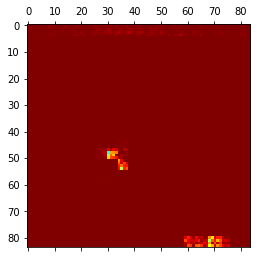

In [343]:
plt.matshow(heatmap.squeeze())

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


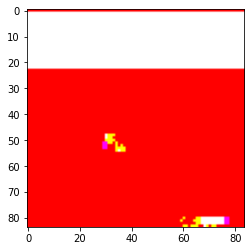

In [344]:
plt.imshow(superimposed_img)

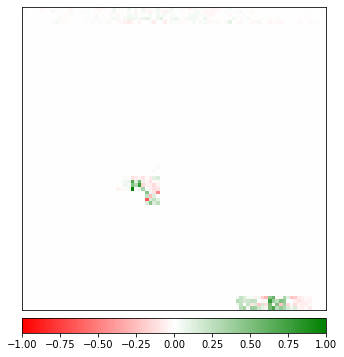

In [345]:
show_attr(attribution, save_path = None)
plt.show()

In [143]:
folder_dir = "./result"
from pathlib import Path
ResultDir = Path(folder_dir)
ResultDir.mkdir(exist_ok=True)

In [24]:
xai.showResult(save_path=ResultDir.joinpath("./Result.png"))

{0: '0', 1: '1', 2: '2', 3: '3'}
probability :  tensor([[1.6103e-05, 4.4897e-04, 9.9946e-01, 7.9566e-05]],
       grad_fn=<SoftmaxBackward>)


In [25]:
xai.show_integrated_gradients(save_folder=ResultDir)
xai.plot_Occlusion(strides=(1, 8, 8), sliding_window_shapes=(1, 15, 15),save_path=ResultDir.joinpath("./Occlusion.png"))
xai.plot_InputXGradient(target=1, save_path=ResultDir.joinpath("./InputXGradeint.png"))
xai.plot_InputXGradient_all_target(save_path=ResultDir.joinpath("./InputXGradeint_ALL.png"))
xai.plot_GuidedBackprop_all_target(n_row=2, save_path=ResultDir.joinpath("./GuideBackprop.png"))
xai.plot_IntegratedGradients_Black(save_path=ResultDir.joinpath("./IntegratedGradients_Black.png"))

Predicted: 2  Probability: tensor([[1.6103e-05, 4.4897e-04, 9.9946e-01, 7.9566e-05]],
       grad_fn=<SoftmaxBackward>)
step1
step2
step3
step4


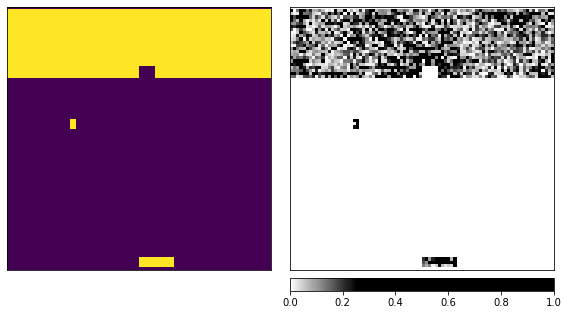

Lime attribution: 100%|██████████| 3/3 [00:08<00:00,  2.95s/it]


In [26]:
xai.plot_IntegratedGradients_NoiseTunnel(save_path=ResultDir.joinpath("./IntegratedGradients_NoiseTunnel.png"))
xai.plot_GradientShap(save_path=ResultDir.joinpath("./GradientShap.png"))
xai.plot_LRLIME(save_path=ResultDir.joinpath("./LRLIME.png"))